In [1]:
%load_ext autoreload
%autoreload 2

%cd ../

/home/nassim/dev/conrl


In [2]:
from src.utils import *
from src.plotting import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as mc
plt.style.use('seaborn-paper')

%matplotlib inline
np.set_printoptions(precision=3, linewidth=80)

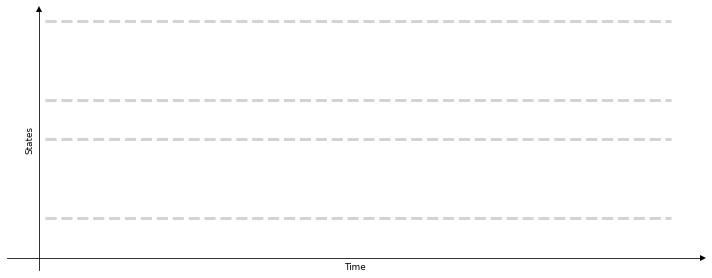

In [42]:
# Dynamic state space adaptation graph

fig, ax = plt.subplots(figsize=(10, 4))
colors = cm.Dark2(np.linspace(0, 1, 3, endpoint=False))

x = np.arange(1, 100)

ax.plot(x, np.full((len(x), ), 10), color="lightgrey", linestyle='dashed', linewidth=3)
ax.plot(x, np.full((len(x), ), 30), color="lightgrey", linestyle='dashed', linewidth=3)
ax.plot(x, np.full((len(x), ), 40), color="lightgrey", linestyle='dashed', linewidth=3)
ax.plot(x, np.full((len(x), ), 60), color="lightgrey", linestyle='dashed', linewidth=3)

full = np.linspace(10, 20, 10) + np.linspace(30, 40, 10) 
ax.plot(full, np.full(full.shape, 10), color="blue", linestyle='dashed', linewidth=3)


ax.set_xticks([])
ax.set_yticks([])
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.set_xlim(0, 90)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set_xlabel("Time")
ax.set_ylabel("States")
fig.tight_layout()

In [66]:
# Taken from sweep panel on wandb

importance = {"e_w": 0.215,
              "e_n": 0.062,
        "error_min": 0.143,
        "lambda": 0.115,
        "age_max": 0.112,
        "nodes_max": 0.092,
         "alpha": 0.077,
         "beta": 0.063,
        "psi": 0.047,
         "k": 0.075
            }

corr = {"e_w": -0.141,
        "e_n": -0.044,
        "error_min": 0.306,
        "lambda": 0.182,
        "age_max": 0.327,
        "nodes_max": 0.102,
        "alpha": -0.151,
       "beta": 0.009,
        "psi":0.030,
       "k": -0.113,
       }

<BarContainer object of 10 artists>

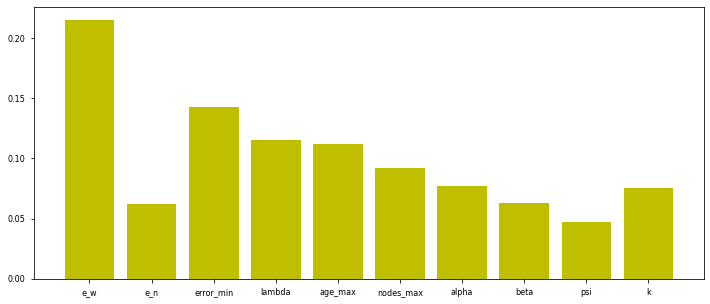

In [67]:
fig, ax = plt.subplots(1, figsize=(12,5))

ax.bar(importance.keys(), importance.values(), color="y")

In [68]:
corr_neg = {k: v for k, v in corr.items() if v < 0}

<BarContainer object of 4 artists>

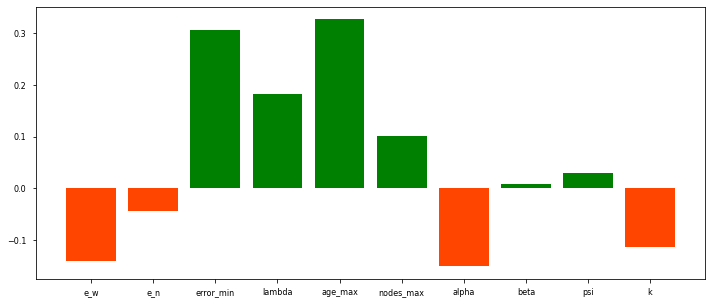

In [69]:
fig, ax = plt.subplots(1, figsize=(12,5))

ax.bar(corr.keys(), corr.values(), color="green")
ax.bar(corr_neg.keys(), corr_neg.values(), color="orangered")

In [119]:
df = []

df.append(pd.read_csv("./src/experiments/csv/conrl_ql.csv"))
df.append(pd.read_csv("./src/experiments/csv/conrl_sarsal.csv"))
df.append(pd.read_csv("./src/experiments/csv/ql.csv"))
df.append(pd.read_csv("./src/experiments/csv/sarsal.csv"))
df.append(pd.read_csv("./src/experiments/csv/base.csv"))

for i, d in enumerate(df):
    cols = [c for c in d.columns if not any([s in c for s in ["MAX", "MIN", "Step"]])]
    df[i]=df[i][cols]



In [121]:
medians = []

for i, d in enumerate(df):
    medians.append(df[i].median(axis=1))
    
df2 = pd.concat(medians, axis=1)
df2.columns = ['conrl_ql', 'conrl_sarsal', 'ql', 'sarsal', 'base']


In [122]:
df2.describe()

,conrl_ql,conrl_sarsal,ql,sarsal,base
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-281.445000,-213.652000,-436.638000,-428.678000,-326.927000
std,206.312246,46.048755,317.036078,340.729223,227.137011
min,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
25%,-247.000000,-220.250000,-694.750000,-731.000000,-288.125000
50%,-220.500000,-207.000000,-243.500000,-199.500000,-246.750000
75%,-197.500000,-193.750000,-222.000000,-175.000000,-216.500000
max,-169.000000,-162.000000,-162.000000,-150.000000,-168.000000


In [123]:
dfs = df2.sum()
dfs["ql"]/dfs

conrl_ql        1.551415
conrl_sarsal    2.043688
ql              1.000000
sarsal          1.018569
base            1.335583
dtype: float64

In [124]:
df2.sum()

conrl_ql       -140722.5
conrl_sarsal   -106826.0
ql             -218319.0
sarsal         -214339.0
base           -163463.5
dtype: float64